# Recording a video with OpenCV

Reference: 
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
- http://tsaith.github.io/record-video-with-python-3-opencv-3-on-osx.html

In [1]:
!cat scripts/record-video.py

import cv2
cap = cv2.VideoCapture(0) # Capture video from camera

# Get the width and height of frame
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use the lower case
out = cv2.VideoWriter('./data/output.mp4', fourcc, 20.0, (width, height))

if cap.isOpened():
    print('Recording!')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if (cv2.waitKey(1) & 0xFF) == ord('q'): # Hit `q` to exit
            break
    else:
        break

# Release everything if job is finished
out.release()
cap.release()
cv2.destroyAllWindows()


In [2]:
!python scripts/record-video.py

Recording!


In [3]:
!rm data/output.mp4

# Recording frames with OpenCV

In [5]:
!cat scripts/record-frames.py

import numpy as np
import cv2

cap = cv2.VideoCapture(0)
count = 0

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    filename = './data/frame{}.jpg'.format(count)
    cv2.imwrite(filename, frame)
    count += 1
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [7]:
!python scripts/record-frames.py

In [8]:
!rm data/*.jpg

# Playing a video from a file

In [45]:
!cat scripts/play-video.py

import cv2

cap = cv2.VideoCapture('./data/video.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    cv2.imshow('frame', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [46]:
!python scripts/play-video.py

Traceback (most recent call last):
  File "scripts/play-video.py", line 8, in <module>
    cv2.imshow('frame', frame)
cv2.error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'



Despite the `cv2.error`, it works.

# Transforming a video to frames using OpenCV

Reference: https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/

In [9]:
import cv2, math

count = 0
videoFile = './data/video.mp4'
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate

while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = './data/frame{}.jpg'.format(count)
        count += 1
        cv2.imwrite(filename, frame)
cap.release()
print('Done!')

Done!


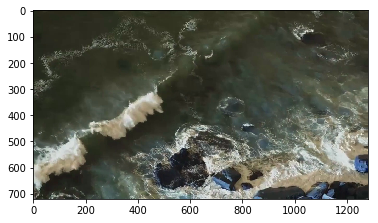

In [11]:
import matplotlib.pyplot as plt
img = cv2.imread('./data/frame7.jpg')
plt.imshow(img)

In [12]:
!rm data/*.jpg

# Identifying the properties of the camera

Reference:
- https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get
- http://www.fourcc.org/codecs.php

Property identifier. It can be one of the following:

0. `CV_CAP_PROP_POS_MSEC`: Current position of the video file in milliseconds or video capture timestamp.
1. `CV_CAP_PROP_POS_FRAMES`: 0-based index of the frame to be decoded/captured next.
2. `CV_CAP_PROP_POS_AVI_RATIO`: Relative position of the video file: 0 - start of the film, 1 - end of the film.
3. `CV_CAP_PROP_FRAME_WIDTH`: Width of the frames in the video stream.
4. `CV_CAP_PROP_FRAME_HEIGHT`: Height of the frames in the video stream.
5. `CV_CAP_PROP_FPS`: Frame rate.
6. `CV_CAP_PROP_FOURCC`: 4-character code of codec.
7. `CV_CAP_PROP_FRAME_COUNT`: Number of frames in the video file.
8. `CV_CAP_PROP_FORMAT`: Format of the Mat objects returned by retrieve() .
9. `CV_CAP_PROP_MODE`: Backend-specific value indicating the current capture mode.
10. `CV_CAP_PROP_BRIGHTNESS`: Brightness of the image (only for cameras).
11. `CV_CAP_PROP_CONTRAST`: Contrast of the image (only for cameras).
12. `CV_CAP_PROP_SATURATION`: Saturation of the image (only for cameras).
13. `CV_CAP_PROP_HUE`: Hue of the image (only for cameras).
14. `CV_CAP_PROP_GAIN`: Gain of the image (only for cameras).
15. `CV_CAP_PROP_EXPOSURE`: Exposure (only for cameras).
16. `CV_CAP_PROP_CONVERT_RGB`: Boolean flags indicating whether images should be converted to RGB.
17. `CV_CAP_PROP_WHITE_BALANCE_U`: The U value of the whitebalance setting (note: only supported by DC1394 v 2.x backend currently)
18. `CV_CAP_PROP_WHITE_BALANCE_V`: The V value of the whitebalance setting (note: only supported by DC1394 v 2.x backend currently)
19. `CV_CAP_PROP_RECTIFICATION`: Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)
20. `CV_CAP_PROP_ISO_SPEED`: The ISO speed of the camera (note: only supported by DC1394 v 2.x backend currently)
21. `CV_CAP_PROP_BUFFERSIZE`: Amount of frames stored in internal buffer memory (note: only supported by DC1394 v 2.x backend currently)


In [13]:
!cat scripts/check-props.py

import cv2

cap = cv2.VideoCapture(0)

# Get the width and height of frame
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use the lower case
out = cv2.VideoWriter('./data/output.mp4', fourcc, 20.0, (width, height))
print(cap.isOpened())

for i in range(20):
    print(i, '->', cap.get(propId=i))
out.release()


In [17]:
!python scripts/check-props.py

True
0 -> 0.0
1 -> 0.0
2 -> 0.0
3 -> 1280.0
4 -> 960.0
5 -> 25.0
6 -> 0.0
7 -> 0.0
8 -> 16.0
9 -> 0.0
10 -> 0.0
11 -> 0.0
12 -> 0.0
13 -> 0.0
14 -> 0.0
15 -> 0.0
16 -> 0.0
17 -> 0.0
18 -> 0.0
19 -> 0.0
20 -> 0.0
21 -> 0.0


So we have:
3. `CV_CAP_PROP_FRAME_WIDTH`: 1280.0
4. `CV_CAP_PROP_FRAME_HEIGHT`: 960.0
5. `CV_CAP_PROP_FPS`: 25.0
8. `CV_CAP_PROP_FORMAT`: 16.0

# Setting the properties of the camera
Lets try to set the width, height and fps:

In [43]:
!cat scripts/record-custom-video.py

import cv2, sys
cap = cv2.VideoCapture(0) # Capture video from camera

# Get the width and height of frame, and the fps
width = int(sys.argv[1])
height = int(sys.argv[2])
fps = int(sys.argv[3])

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use the lower case
out = cv2.VideoWriter('./data/output.mp4', fourcc, fps, (width, height))

# Set custom values
r1 = cap.set(3, width)
r2 = cap.set(4, height)
r3 = cap.set(5, fps)
print('3 ->', r1, ',', cap.get(propId=3))
print('4 ->', r2, ',', cap.get(propId=4))
print('5 ->', r3, ',', cap.get(propId=5))

while not cap.isOpened():
    cap.open()
    
g1 = cap.get(3)
g2 = cap.get(4)
g3 = cap.get(5)
print('Recording using {} x {} and fps {}!'.format(g1, g2, g3))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if (cv2.waitKey(1) & 0xFF) 

In [44]:
!python scripts/record-custom-video.py 640 480 5

3 -> True , 640.0
4 -> True , 480.0
5 -> True , 5.0
Recording using 640.0 x 480.0 and fps 5.0!
